# Octave notebook examples
Here we present a couple of examples of PathFinder. We are using Octave so that this can be run in a MyBinder notebook.

It does not appear possible to compile MEX functions in a MyBinder container, so here MEX functions are disabled. **Be warned**: the combination of (1) running octave in a free myBinder container and (2) running without MEX makes for an incredibly slow process. CPU times will be significantly improved if you install PathFnider locally.

In [12]:
graphics_toolkit("gnuplot")


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.


In [1]:
addpath ..;
addPaths();
format long;
% some plot formatting warnings will appear only in mybinder
warning('off','Octave:text_interpreter');

## Simple example
For this first example, we will consider the integral
$
I_{\omega,J} = \int_0^\infty \exp(\mathrm{i}\omega x^J)~ \mathrm{d} x,
$
for $2\leq J\in\mathbb{N}$ and $\omega>0$. We will derive an exact value for this and compare it to the PathFinder approximation.

By Jordan's Lemma, we can deform the contour $[0,\infty]$ onto the contour parameterised by

$
h(p)=\left(\frac{\mathrm{i} p}{\omega}\right)^{1/J}\mathrm{e}^{2\pi\mathrm{i}/J},\quad p\in[0,\infty].
$

Now

$
I_{\omega,J} = \int_{0}^\infty \exp(\mathrm{i}\omega h(p)^J) h'(p) ~ \mathrm{d} p
= \frac{1}{J}\left(\frac{\mathrm{i}\mathrm{e}^{2\pi\mathrm{i}/J}}{\omega}\right)^J\Gamma(1/J),
$

where $\Gamma$ denotes the Gamma function.

In [2]:
# choose values:
J = 3;
omega = 100;

In [3]:
% define the exact value of integral as a function handle
Iexact =  (1/J)*(1i/omega)^(1/J) * gamma(1/J)

Iexact =  1.666116861704140e-01 + 9.619330186062594e-02i


In [4]:
% Define PathFinder approximation, again as a function handle
numQuadPts = 10;
Ipathfinder =  PathFinder(0, % lower limit of integral is zero
                            0, % argument (angle) of upper limit of integral is zero
                            [], % no amplitude function given
                            [1 zeros(1,J)], # monomial phase coefficients, with leading term first
                            omega,
                            numQuadPts, # parameter which determines the number of points per contour
                            'inf contour', [false true], % first enpoint finite, second endpoint infinite
                            'use mex', false % cannot compile MEX functions in myBinder :-(
                            )

Ipathfinder =  1.666116858440892e-01 + 9.619330167222226e-02i


## A more complicated example
Now we approximate the [swallowtail catastrophe integral](https://dlmf.nist.gov/36.2):

$
\Psi_3(x_1,x_2,x_3):=\int_{-\infty}^\infty \exp(\mathrm{i}[t^{5}+x_1t+x_2t^2+x_3t^3]) ~\mathrm{d}t.
$

The coefficients of the phase function vary in three spatial dimensions, so we define our approximation as a function handle with three inputs. Such spatially varying integral representations arise in a broad range of applications.

In [5]:
numQuadPts = 10; % quadrature points per contour

I3 = @(x1, x2, x3) PathFinder(pi, 0, ... % complex angles of endpoints of integral
                            [], ... % no amplitude function
                            [1 0 x3 x2 x1 0],... % coefficients of swallowtail catastrophe
                            1, ... % no frequncy parameter here
                            numQuadPts, ... % quadrature points per contour
                            'infcontour', [true true], % flag for inf contours
                            'use mex', false); % cannot compile MEX functions in myBinder

In [6]:
% determine approximation/sampling parameters
numPixels = 15; % how many pixels in each direction - may take a couple of minutes to run

x3val = -5; % fix x3 value
xRange = linspace(-8, 12, numPixels);
yRange = linspace(-8, 8, numPixels);
plotVals = zeros(numPixels); % initialise output to plot

% sample at desired points
for ix = 1:numPixels
    for iy = 1:numPixels
        plotVals(iy, ix) = I3(xRange(ix), yRange(iy), x3val);
    end
end

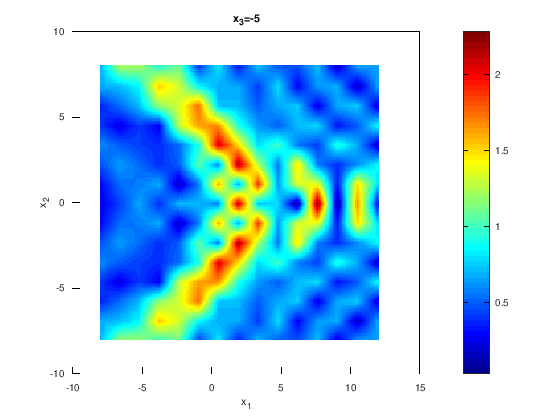

In [13]:
surf(xRange, yRange, abs(plotVals));
view([0 90]);
xlabel('x_1');
ylabel('x_2');
colorbar;
title(['x_3=',num2str(x3val, 2)]);
colormap('jet');
shading interp;
grid off;

Now let's inspect `PathFinder`'s contour deformation for a some values of $(x_1,x_2,x_3)$. Recall that the red points are where the integrand is sampled, the black lines are all possible steepest descent contours, and the grey balls are the non-oscillatory region, where the integrand is deemed to be mildly oscillating and not growing too rapidly. This non-oscillatory region gets bigger as the stationary points coalesce.

In [8]:
I3plot = @(x1, x2, x3) PathFinder(pi, 0, ... % complex angles of endpoints of integral
                            [], ... % no amplitude function
                            [1 0 x3 x2 x1 0],... % coefficients of swallowtail catastrophe
                            1, ... % no frequncy parameter here
                            numQuadPts, ... % quadrature points per contour
                            'infcontour', [true true], % flag for inf contours
                            'plot', % plot contours
                            'use mex', false); % cannot compile MEX functions in myBinder

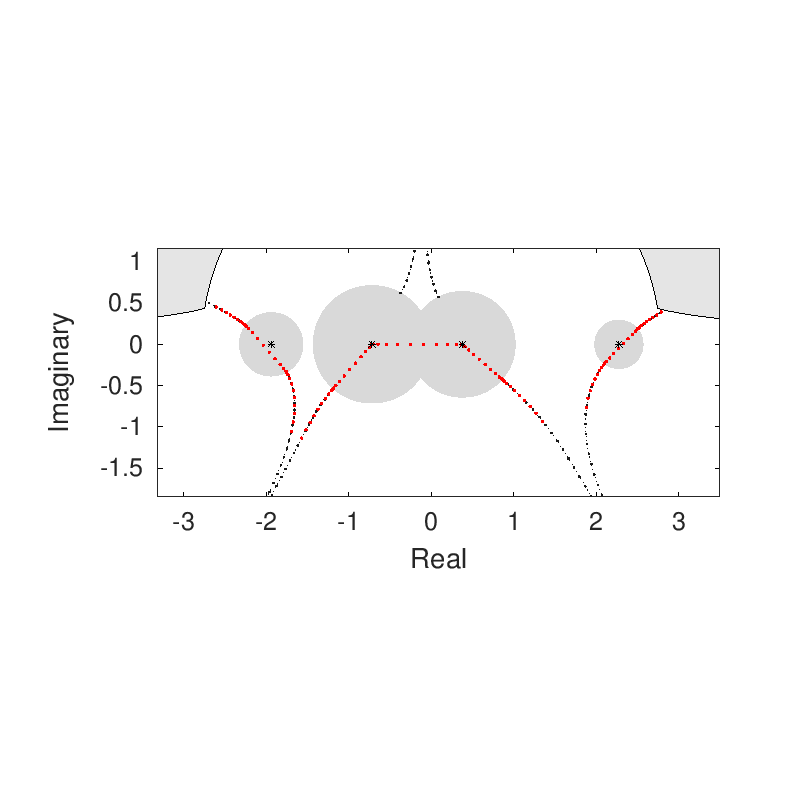

In [14]:
I3plot(6,-3.5,-8.0);

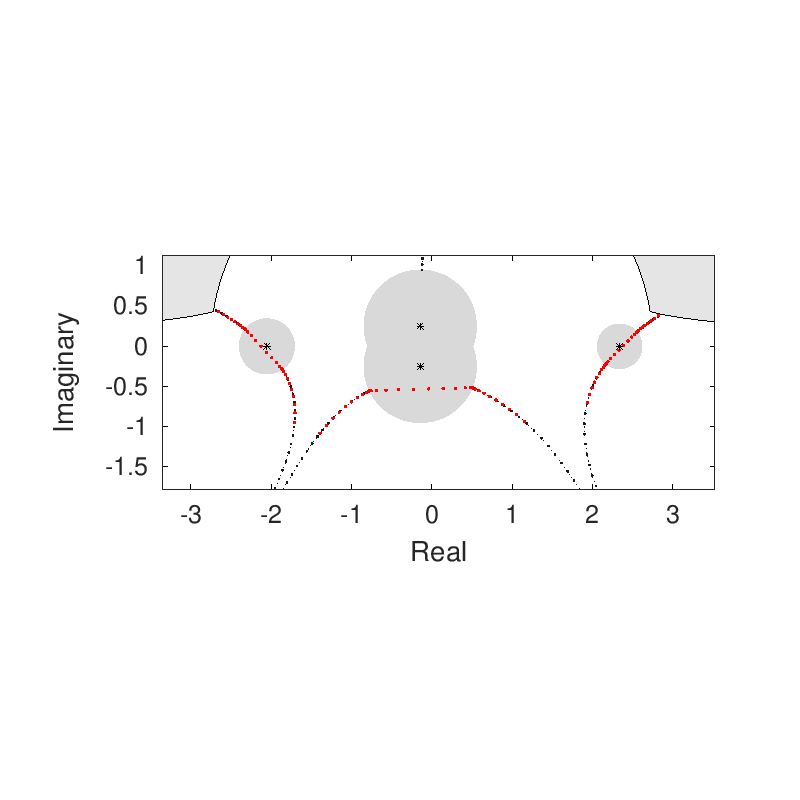

In [15]:
I3plot(-2,-3.5,-8.0);

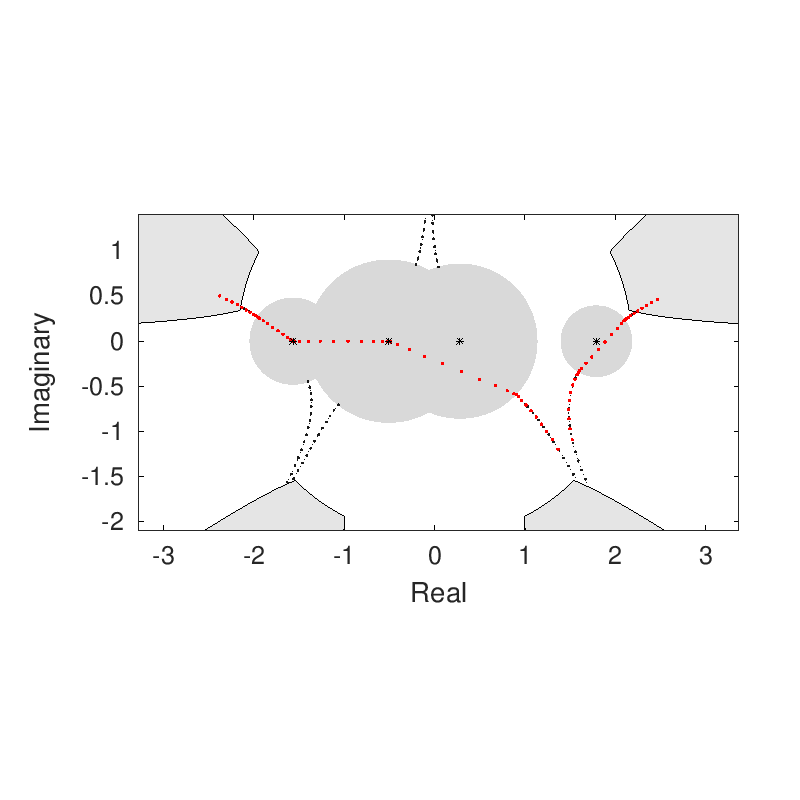

In [16]:
I3plot(2.0,-1.5,-5.0);